In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from load_data import loadData
from inspect_data import inspectData
from missing_value_check import checkMissingValues
from plote_price import plotPrice
from plote_Price_SMA import plotPriceAndSMA
from plote_MACD import plotMACD
from plote_RSI import plotRSI
# TA-Lib for indicators
import talib

# PyNance and PyFolio will be used later, we just import them now
import talib                      # technical indicators
import pynance as py              # from GitHub version
import quantstats as qs   

# Make plots a bit nicer
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)


C:\Users\Birhanu Matebe\Downloads\KAIM\Finanicial-Data-Analysis\Financial-Data-Analysis\src\load_data.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)

1 Failed download:
['GOOG']: Timeout('Failed to perform, curl: (28) Operation timed out after 10001 milliseconds with 98230 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


## Load or download a data (META)

In [2]:
# ============================================
# Download META daily data for a year
# ============================================

ticker = "META"

df = loadData(ticker)
print(df.head())


C:\Users\Birhanu Matebe\Downloads\KAIM\Finanicial-Data-Analysis\Financial-Data-Analysis\src\load_data.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price           Close       High        Low       Open     Volume
Ticker           META       META       META       META       META
Date                                                             
2012-05-18  37.995762  44.724282  37.767172  41.792356  573576400
2012-05-21  33.821495  36.435382  32.797807  36.306177  168192700
2012-05-22  30.810064  33.384196  30.750432  32.410201  101786600
2012-05-23  31.803938  32.300874  31.167860  31.177799   73600000
2012-05-24  32.827629  33.006527  31.575351  32.748121   50237200


# 1. Data profiling

In [3]:
# ============================================
# Clean the columns (handle MultiIndex case)
# ============================================

# If columns are MultiIndex (like: ('Close', 'AMZN')), flatten them
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)  # keep only first level: Open, High, etc.

print("Cleaned columns:", df.columns.tolist())

# Optional: add a Ticker column (useful if using multiple tickers later)
df["Ticker"] = ticker

# Ensure index is datetime and sorted
df.index = pd.to_datetime(df.index)
df = df.sort_index()




Cleaned columns: ['Close', 'High', 'Low', 'Open', 'Volume']


# - Summary Statistics 

In [4]:

inspectData(df)


📌 Dataset Shape: (2922, 6)

📌 First 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2012-05-18,37.995762,44.724282,37.767172,41.792356,573576400,META
2012-05-21,33.821495,36.435382,32.797807,36.306177,168192700,META
2012-05-22,30.810064,33.384196,30.750432,32.410201,101786600,META
2012-05-23,31.803938,32.300874,31.167860,31.177799,73600000,META
2012-05-24,32.827629,33.006527,31.575351,32.748121,50237200,META



📌 Last 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2023-12-21,351.920502,354.226294,347.070396,350.817317,15289600,META
2023-12-22,351.224823,355.011477,349.068105,353.401377,11772800,META
2023-12-26,352.655975,354.792827,351.284456,352.814999,9898600,META
2023-12-27,355.637604,356.800449,353.133054,353.888408,13207900,META
2023-12-28,356.124573,359.682625,355.617688,357.496122,11798800,META



📌 Random 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2021-10-01,340.908386,342.906050,336.565166,339.516940,14905300,META
2022-02-28,209.737061,211.844067,205.562796,206.407579,34239800,META
2013-07-10,25.641922,25.671739,25.313944,25.423271,26721800,META
2020-06-24,232.586166,241.729795,231.254365,239.722167,20834900,META
2019-06-17,187.851944,188.338947,183.280137,183.876452,29459900,META



📌 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2012-05-18 to 2023-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2922 non-null   float64
 1   High    2922 non-null   float64
 2   Low     2922 non-null   float64
 3   Open    2922 non-null   float64
 4   Volume  2922 non-null   int64  
 5   Ticker  2922 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 159.8+ KB


In [5]:
# check if a null value exists


key_cols = ['Close', 'Open', 'High', 'Volume', 'Ticker']

checkMissingValues(df,key_cols )


📌 Missing values per column:
Price
Close     0
High      0
Low       0
Open      0
Volume    0
Ticker    0
dtype: int64

📌 Columns with >5% missing values:
✔️ None

📌 Total rows with missing values in key columns ['Close', 'Open', 'High', 'Volume', 'Ticker']: 0
✔️ No missing rows in key columns


In [6]:
# log statistical data values
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
Price        Close         High          Low         Open        Volume
count  2922.000000  2922.000000  2922.000000  2922.000000  2.922000e+03
mean    156.660683   158.622345   154.618370   156.585133  3.061150e+07
std      90.312119    91.412164    89.165274    90.248324  2.637450e+07
min      17.621368    18.158061    17.442471    17.969224  5.467500e+06
25%      80.275124    80.950965    79.651466    80.260221  1.635358e+07
50%     152.569458   154.626775   150.720855   152.678789  2.295815e+07
75%     203.478134   206.283304   200.474132   202.924032  3.522885e+07
max     379.838409   381.975227   376.489059   379.341431  5.735764e+08


In [7]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
Price  Ticker
count    2922
unique      1
top      META
freq     2922


In [8]:
# log and check the frequency, and uniqueness of all dataset column
print("The description of all columns:")
print(df.describe(include='all'))


The description of all columns:
Price         Close         High          Low         Open        Volume  \
count   2922.000000  2922.000000  2922.000000  2922.000000  2.922000e+03   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean     156.660683   158.622345   154.618370   156.585133  3.061150e+07   
std       90.312119    91.412164    89.165274    90.248324  2.637450e+07   
min       17.621368    18.158061    17.442471    17.969224  5.467500e+06   
25%       80.275124    80.950965    79.651466    80.260221  1.635358e+07   
50%      152.569458   154.626775   150.720855   152.678789  2.295815e+07   
75%      203.478134   206.283304   200.474132   202.924032  3.522885e+07   
max      379.838409   381.975227   376.489059   379.341431  5.735764e+08   

Price  Ticker  
count    2922  
unique      1  
top    

In [9]:
#check if duplication of rows exist
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


In [10]:
# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Cardinality (categoricals): {'Ticker': 1}


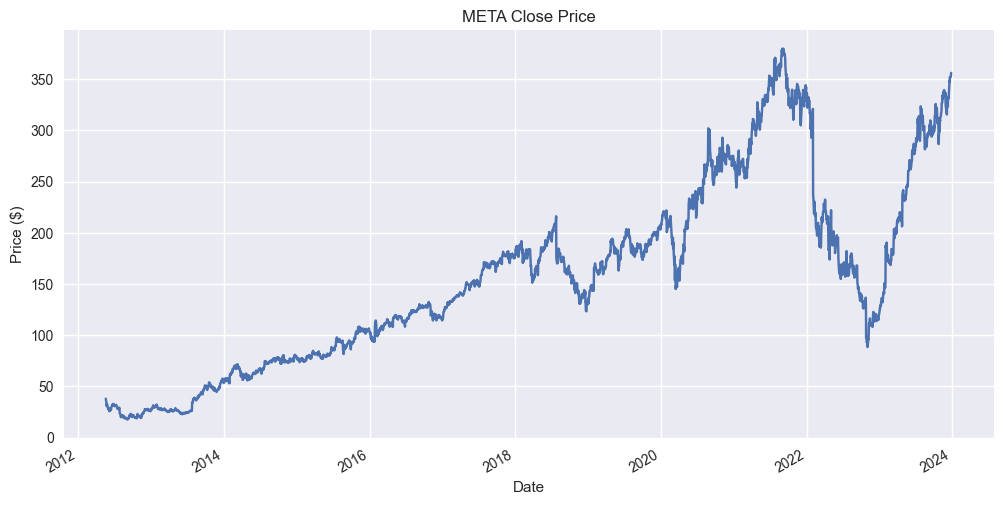

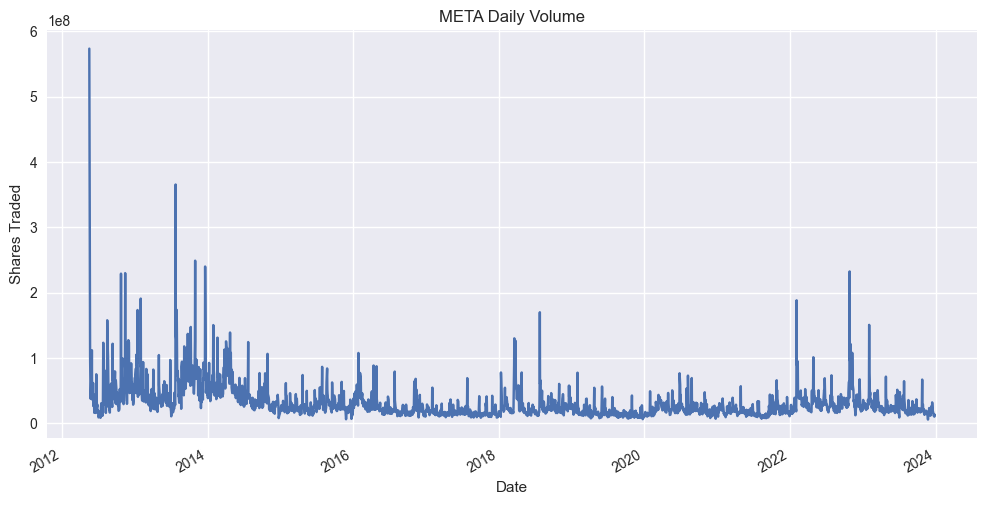

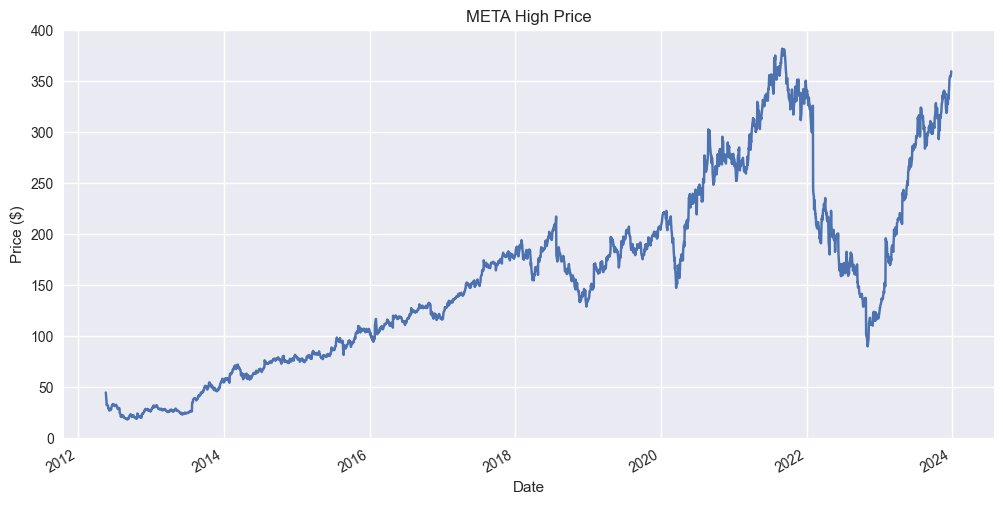

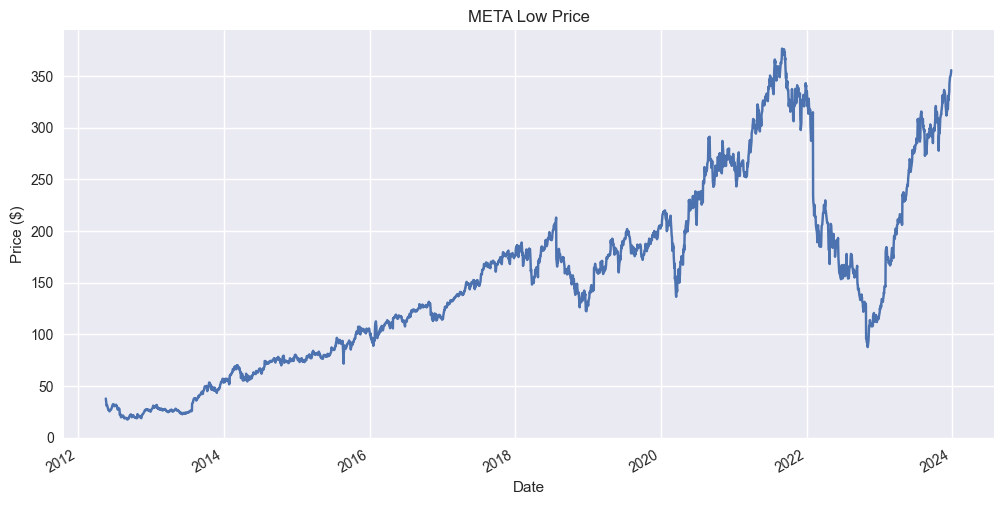

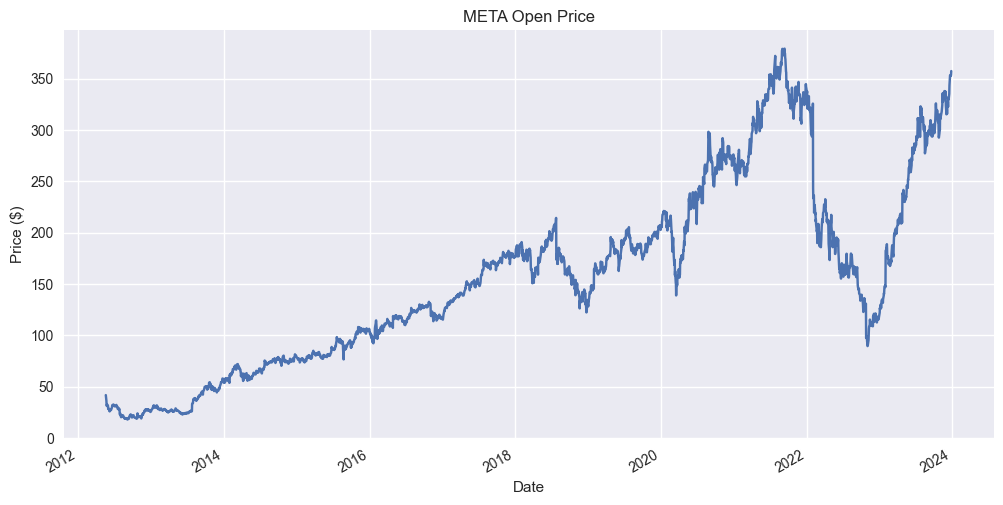

In [11]:


plotPrice(df, ticker)


## Stock price over time

## Interpretation of Meta Platforms (META) Price History (2012–2024)
1. Long-Term Trend: High-Growth, High-Volatility
- The overall trajectory from the 2012 IPO price (around $25-$40) to the current price (around $350) represents phenomenal long-term growth. However, this growth has been interrupted by severe and rapid price swings.

2. Key Phases of Price Movement
- 2012 – 2021: Aggressive, Volatile Ascent: After stabilizing from its initial IPO volatility, the stock settled into a strong uptrend driven by the dominance of its social media platforms (Facebook, Instagram, WhatsApp). This period is marked by several significant, sharp dips (e.g., 2018-2019) that were quickly recovered. The price peaked near $380 in mid-2021.

- Late 2021 – Late 2022: The "Triple Whammy" Crash: This is the most dramatic phase of the chart. The stock suffered a catastrophic bear market correction, falling from $380 to a low around $88. This massive decline was driven by:

- Slowdown in Core Business: Deceleration of user growth and pressure on ad revenue.

- Increased Competition: Challenges from rivals like TikTok.

- The Metaverse Bet: Massive investor skepticism and high capital expenditure on the transition to the "Metaverse," which raised concerns about profitability.

- 2023 – Early 2024: Record Recovery: The stock staged one of the most remarkable comebacks in recent market history. The price more than quadrupled from its 2022 low, soaring back above $350. This recovery was fueled by:

- "Year of Efficiency": Aggressive cost-cutting and layoffs.

- Improved Core Business: Rebounding ad revenue and better monetization of its platforms.

- AI Integration: Strong performance and future potential in integrating AI across its products.

3. Volatility Profile
- Meta's chart highlights the extreme volatility associated with high-growth, platform-dependent tech companies. The stock delivered immense returns but required investors to endure two different periods of 40%+ drawdowns before the final, cataclysmic 77% crash in 2022. The 2023 recovery is equally dramatic, showing that when investor confidence returns, the price can move explosively fast.

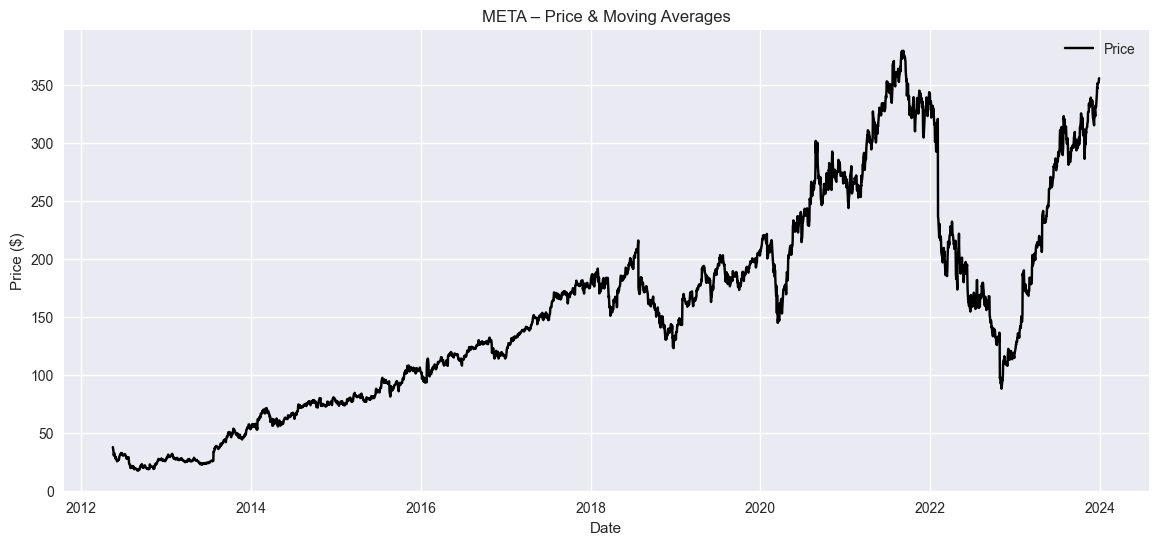

In [12]:

plotPriceAndSMA(df, ticker)


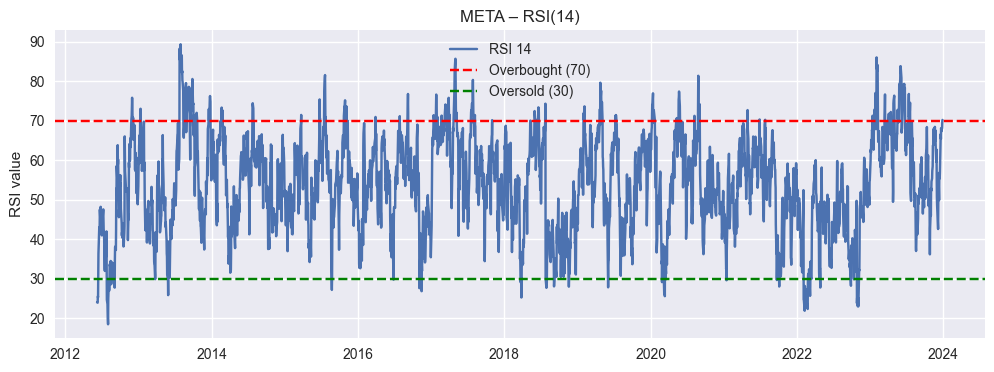

In [13]:


plotRSI(df, ticker)



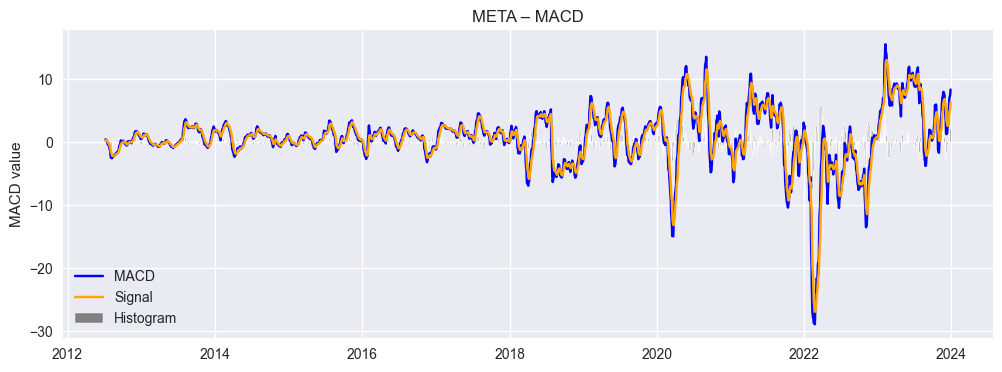

In [14]:
plotMACD(df, ticker)


## Interpretation of Meta Platforms (META) MACD
- The MACD (12, 26, 9) measures the momentum of Meta's closing price. This chart is defined by two extreme conditions: extended periods of strong positive momentum, followed by a sudden, catastrophic shift to extreme negative momentum, and then a quick recovery.

1. The Long-Term Bull Trend (2012–2021)
- Sustained Positive Momentum: For the majority of the period up to 2021, the MACD Line and Signal Line were consistently positioned above the Zero Line. This confirms a strong, healthy uptrend where short-term momentum was continuously faster than medium-term momentum.

- Minor Dips: While the MACD occasionally dipped toward the zero line during pullbacks, it always quickly rebounded, reinforcing the overall bullish bias.

2. The Defining 2022 Momentum Collapse 
- This phase is the most visually dramatic part of the chart and confirms the severity of the stock's correction:

- Massive Plunge Below Zero: In late 2021/early 2022, the MACD Line plunged sharply and deeply below the Zero Line, reaching extreme negative values. This signaled a fundamental and catastrophic loss of positive momentum.

- Significance: The depth and length of time the MACD remained in deep negative territory (especially from late 2022 to early 2023) technically confirmed the existence of a severe bear market. The momentum breakdown was caused by a slowdown in user growth, competition from TikTok, and huge capital expenditure on the Metaverse, which led to lower-than-expected earnings and profits. The market cap saw the biggest one-day loss in US stock history at the time.

3. The 2023 Momentum Recovery 
- Aggressive Crossover and Return to Positive: The stock's massive recovery in 2023 is heralded by a sharp and decisive MACD crossover (MACD Line above Signal Line) followed by the entire formation moving back above the Zero Line.

- Significance: This signaled the forceful return of positive momentum, driven by investor confidence in Meta's "Year of Efficiency" (cost-cutting), rebounding ad revenue, and focus on AI.

## Interpretation of Meta Platforms (META) Relative Strength Index (RSI 14)
- The RSI (14) measures the speed and change of META's closing price movements and highlights how momentum shifted during the company's major events.

1. High Amplitude Oscillations
- The most notable feature is the high amplitude of the RSI line's movement. It swings frequently and dramatically, confirming that Meta's closing price is subject to periods of extreme positive momentum followed by sharp corrections. This reflects the volatility inherent in a platform-based company where sentiment shifts quickly.

2. Overbought Signals (RSI > 70) 
- The RSI line regularly crosses the 70 (Overbought) threshold. This was especially frequent during the long rally phase (2012–2021) and the powerful recovery of 2023-2024.

- Significance: In a fast-moving growth stock like META, these readings signal intense, high-conviction buying and rapidly accelerating upward momentum.

3. Critical: Deep and Sustained Oversold Period (RSI < 30) 
- The RSI line confirms the technical breakdown of the 2022 period. It plunged sharply below the 30 (Oversold) line and spent a significant amount of time in deep oversold territory.

- Significance: This extreme oversold condition confirms the severity and the high-conviction fear that drove the closing price collapse (a 77% drawdown from peak). Such a sustained low RSI reading is a technical sign of panic selling.

- High-Conviction Buying: The eventual snap-back from this extreme low, which marked the start of the 2023 recovery, provided a textbook example of an excellent, deep-value entry point for long-term buyers.

## Interpretation of Meta Platforms (META) MACD
- The MACD (12, 26, 9) measures the momentum of Meta's closing price. This chart is defined by two extreme conditions: extended periods of strong positive momentum, followed by a sudden, catastrophic shift to extreme negative momentum, and then a quick recovery.

1. The Long-Term Bull Trend (2012–2021)
- Sustained Positive Momentum: For the majority of the period up to 2021, the MACD Line and Signal Line were consistently positioned above the Zero Line. This confirms a strong, healthy uptrend where short-term momentum was continuously faster than medium-term momentum.

- Minor Dips: While the MACD occasionally dipped toward the zero line during pullbacks, it always quickly rebounded, reinforcing the overall bullish bias.

2. The Defining 2022 Momentum Collapse 
- This phase is the most visually dramatic part of the chart and confirms the severity of the stock's correction:

- Massive Plunge Below Zero: In late 2021/early 2022, the MACD Line plunged sharply and deeply below the Zero Line, reaching extreme negative values (approaching -30). This signaled a fundamental and catastrophic loss of positive momentum.

- Significance: The depth and length of time the MACD remained in deep negative territory technically confirmed the existence of a severe bear market. The momentum breakdown was caused by factors like high capital expenditure on the Metaverse, decelerating user growth, and concerns over profitability.

3. The 2023 Momentum Recovery 

- Aggressive Crossover and Return to Positive: The stock's massive recovery in 2023 is heralded by a sharp and decisive MACD crossover (MACD Line above Signal Line) followed by the entire formation moving back above the Zero Line.

- Significance: This signaled the forceful restoration of positive momentum, driven by investor confidence in cost-cutting ("Year of Efficiency") and rebounding core ad business performance.